# 1단계 : 데이터 준비 & ML 기초

---



**작업일**: 10/15(수)  
**담당**: 전체  
**목표**: 데이터 전처리 완료

In [ ]:
# ========================================
# 데이터 로드
# ========================================
from google.colab import drive
drive.mount('/content/drive')

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')

print("=" * 70)
print("🏦 HOME CREDIT DEFAULT RISK - 데이터 로딩")
print("=" * 70)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🏦 HOME CREDIT DEFAULT RISK - 데이터 로딩


In [ ]:
# 메인 테이블 로드
import pandas as pd

train_path = '/content/drive/MyDrive/3차_프로젝트/data/application_train.csv'
test_path = '/content/drive/MyDrive/3차_프로젝트/data/application_test.csv'
bureau_path = '/content/drive/MyDrive/3차_프로젝트/data/bureau.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
bureau = pd.read_csv(bureau_path)

print("✅ 불러오기 완료")
print("train shape:", train.shape)
print("test shape:", test.shape)
print("bureau shape:", bureau.shape)


✅ 불러오기 완료
train shape: (307511, 122)
test shape: (48744, 121)
bureau shape: (1716428, 17)


## TARGET 변수 분석


🎯 TARGET 변수 분석

📊 TARGET 분포:
----------------------------------------------------------------------
  정상 상환 (0): 282,686명 (91.93%)
  연체 발생 (1):  24,825명 ( 8.07%)
----------------------------------------------------------------------
  불균형 비율: 1 : 11.4
  ⚠️  심한 불균형 데이터 - 처리 필요!


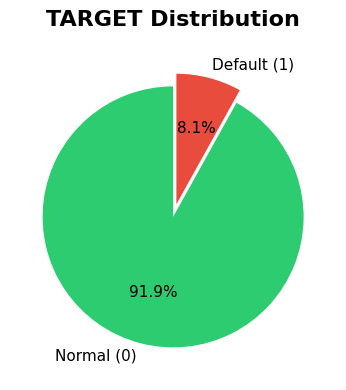


✅ TARGET 분석 완료!


In [ ]:
# ========================================
# TARGET 변수 분석
# ========================================
print("\n" + "=" * 70)
print("🎯 TARGET 변수 분석")
print("=" * 70)

# 분포 계산
target_counts = train['TARGET'].value_counts()
target_pct = train['TARGET'].value_counts(normalize=True) * 100

print("\n📊 TARGET 분포:")
print("-" * 70)
print(f"  정상 상환 (0): {target_counts[0]:>7,}명 ({target_pct[0]:>5.2f}%)")
print(f"  연체 발생 (1): {target_counts[1]:>7,}명 ({target_pct[1]:>5.2f}%)")
print("-" * 70)
print(f"  불균형 비율: 1 : {target_counts[0]/target_counts[1]:.1f}")
print("  ⚠️  심한 불균형 데이터 - 처리 필요!")
print("=" * 70)

# 시각화 - 파이 차트만
plt.figure(figsize=(4, 4))

colors = ['#2ecc71', '#e74c3c']

plt.pie(target_counts, labels=['Normal (0)', 'Default (1)'],
        autopct='%1.1f%%', colors=colors, startangle=90,
        textprops={'fontsize': 11},
        explode=(0, 0.1))
plt.title('TARGET Distribution', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n✅ TARGET 분석 완료!")

## 주요 칼럼 선정

In [ ]:
# ========================================
# 주요 칼럼만 선택
# ========================================
print("\n" + "=" * 70)
print("🎯 주요 칼럼 선정")
print("=" * 70)

# 선택할 칼럼 리스트
selected_cols = [
    'TARGET',                # 예측 목표
    'NAME_CONTRACT_TYPE',    # 대출 유형
    'AMT_INCOME_TOTAL',      # 연소득
    'AMT_CREDIT',            # 대출 금액
    'AMT_ANNUITY',           # 연간 상환액
    'AMT_GOODS_PRICE',       # 구매 상품 가격
    'NAME_INCOME_TYPE',      # 소득 유형
    'NAME_EDUCATION_TYPE',   # 학력
    'NAME_FAMILY_STATUS',    # 결혼 상태
    'DAYS_BIRTH',            # 생일 (음수)
    'DAYS_EMPLOYED',         # 고용 기간 (음수)
    'FLAG_OWN_CAR',          # 차 소유 여부
    'FLAG_OWN_REALTY',       # 부동산 소유 여부
    'CNT_CHILDREN',          # 자녀 수
    'CNT_FAM_MEMBERS',       # 가족 수
]

# Train에서 선택
train_selected = train[selected_cols].copy()

# Test에서 선택 (TARGET 제외)
test_cols = [col for col in selected_cols if col in test.columns]
test_selected = test[test_cols].copy()

print(f"\n✅ Train: {train_selected.shape[0]:,}행 x {train_selected.shape[1]}열")
print(f"✅ Test:  {test_selected.shape[0]:,}행 x {test_selected.shape[1]}열")

print("\n📋 선택된 칼럼:")
print("-" * 70)
for i, col in enumerate(selected_cols, 1):
    print(f"  {i:2d}. {col}")

print("=" * 70)

# 미리보기
print("\n📊 Train 데이터 미리보기:")
print(train_selected.head())


🎯 주요 칼럼 선정

✅ Train: 307,511행 x 15열
✅ Test:  48,744행 x 14열

📋 선택된 칼럼:
----------------------------------------------------------------------
   1. TARGET
   2. NAME_CONTRACT_TYPE
   3. AMT_INCOME_TOTAL
   4. AMT_CREDIT
   5. AMT_ANNUITY
   6. AMT_GOODS_PRICE
   7. NAME_INCOME_TYPE
   8. NAME_EDUCATION_TYPE
   9. NAME_FAMILY_STATUS
  10. DAYS_BIRTH
  11. DAYS_EMPLOYED
  12. FLAG_OWN_CAR
  13. FLAG_OWN_REALTY
  14. CNT_CHILDREN
  15. CNT_FAM_MEMBERS

📊 Train 데이터 미리보기:
   TARGET NAME_CONTRACT_TYPE  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0       1         Cash loans          202500.0    406597.5      24700.5   
1       0         Cash loans          270000.0   1293502.5      35698.5   
2       0    Revolving loans           67500.0    135000.0       6750.0   
3       0         Cash loans          135000.0    312682.5      29686.5   
4       0         Cash loans          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0      

In [ ]:
train_selected.head(10)

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS
0,1,Cash loans,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,-637,N,Y,0,1.0
1,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-16765,-1188,N,N,0,2.0
2,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-19046,-225,Y,Y,0,1.0
3,0,Cash loans,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-19005,-3039,N,Y,0,2.0
4,0,Cash loans,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-19932,-3038,N,Y,0,1.0
5,0,Cash loans,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,-16941,-1588,N,Y,0,2.0
6,0,Cash loans,171000.0,1560726.0,41301.0,1395000.0,Commercial associate,Higher education,Married,-13778,-3130,Y,Y,1,3.0
7,0,Cash loans,360000.0,1530000.0,42075.0,1530000.0,State servant,Higher education,Married,-18850,-449,Y,Y,0,2.0
8,0,Cash loans,112500.0,1019610.0,33826.5,913500.0,Pensioner,Secondary / secondary special,Married,-20099,365243,N,Y,0,2.0
9,0,Revolving loans,135000.0,405000.0,20250.0,405000.0,Working,Secondary / secondary special,Single / not married,-14469,-2019,N,Y,0,1.0


In [ ]:
train['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [ ]:
train['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [ ]:
# NAME_FAMILY_STATUS가 'Unknown'인 행 갯수
unknown_count = train_selected[train_selected['NAME_FAMILY_STATUS'] == 'Unknown'].shape[0]

print("Unknown 갯수:", unknown_count)

Unknown 갯수: 2


In [ ]:
# 1️⃣ Unknown 값 삭제
train = train[train['NAME_FAMILY_STATUS'] != 'Unknown']

# 2️⃣ 삭제 확인 (Unique 값 확인)
print(train['NAME_FAMILY_STATUS'].unique())

# 3️⃣ Unknown이 남아있는지 개수 확인
print("Unknown 개수:", (train['NAME_FAMILY_STATUS'] == 'Unknown').sum())

['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
Unknown 개수: 0


In [ ]:
train['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

## application

### 담당 칼럼 인코딩

In [ ]:
# NAME_EDUCATION_TYPE_ENC 컬럼 생성(주비 완료!)
# 기존 칼럼명 : NAME_EDUCATION_TYPE
# 사용 인코딩 : Ordinal Encoding
edu_order = {
    'Lower secondary': 0,
    'Secondary / secondary special': 1,
    'Incomplete higher': 2,
    'Higher education': 3,
    'Academic degree': 4
}

train_selected['NAME_EDUCATION_TYPE_ENC'] = train_selected['NAME_EDUCATION_TYPE'].map(edu_order)

# 결과 확인
train_selected[['NAME_EDUCATION_TYPE', 'NAME_EDUCATION_TYPE_ENC']].head()

,NAME_EDUCATION_TYPE,NAME_EDUCATION_TYPE_ENC
0,Secondary / secondary special,1
1,Higher education,3
2,Secondary / secondary special,1
3,Secondary / secondary special,1
4,Secondary / secondary special,1


In [ ]:
# FLAG_OWN_CAR_ENC 컬럼 생성(주비 완료!)
# 기존 칼럼명 : FLAG_OWN_CAR
# 사용 인코딩 : Binary Encoding
train_selected['FLAG_OWN_CAR_ENC'] = train_selected['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})

# 결과 확인
train_selected[['FLAG_OWN_CAR', 'FLAG_OWN_CAR_ENC']].head()

,FLAG_OWN_CAR,FLAG_OWN_CAR_ENC
0,N,0
1,N,0
2,Y,1
3,N,0
4,N,0


In [ ]:
# 소득상태 원핫인코딩(정화완료!)
income_encoded = pd.get_dummies(train_selected['NAME_INCOME_TYPE'], drop_first=True)
income_encoded.columns = ['income_type_' + columns for columns in income_encoded.columns]
income_encoded

,income_type_Commercial associate,income_type_Maternity leave,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Unemployed,income_type_Working
0,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,True
307507,False,False,True,False,False,False,False
307508,False,False,False,False,False,False,True
307509,True,False,False,False,False,False,False


In [ ]:
# 대출유형 인코딩(정화완료!)
contract_type = np.where(train_selected['NAME_CONTRACT_TYPE']=='Cash loans',1,0)
contract_type_df = pd.DataFrame({'contract_type': contract_type})
contract_type_df

,contract_type
0,1
1,1
2,0
3,1
4,1
...,...
307506,1
307507,1
307508,1
307509,1


In [ ]:
# 합치기(정화완료!)
df_cat1 = pd.concat([income_encoded,contract_type_df], axis=1)
df_cat1

,income_type_Commercial associate,income_type_Maternity leave,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Unemployed,income_type_Working,contract_type
0,False,False,False,False,False,False,True,1
1,False,False,False,True,False,False,False,1
2,False,False,False,False,False,False,True,0
3,False,False,False,False,False,False,True,1
4,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,True,1
307507,False,False,True,False,False,False,False,1
307508,False,False,False,False,False,False,True,1
307509,True,False,False,False,False,False,False,1


In [ ]:
# 결혼상태 값들 변경 (준영완료)
mapping = {
    'Married': 'M',
    'Civil marriage': 'S',
    'Single / not married': 'S',
    'Separated': 'D',
    'Widow': 'D'
}

train_copy = train_selected.copy()
train_copy['NAME_FAMILY_STATUS'] = train_copy['NAME_FAMILY_STATUS'].replace(mapping)

# 결혼상태 인코딩
NAME_FAMILY_STATUS_encoded = pd.get_dummies(
    train_copy,
    columns=['NAME_FAMILY_STATUS'],
    prefix='status',
    drop_first=True,
    dummy_na=False  # 필요시 True
)

#참고: bool → int 변환은 필수는 아님 (scikit-learn은 자동으로 처리)

status_cols=['status_S','status_M']
NAME_FAMILY_STATUS_encoded[status_cols]#

,status_S,status_M
0,True,False
1,False,True
2,True,False
3,True,False
4,True,False
...,...,...
307506,False,False
307507,False,False
307508,False,False
307509,False,True


In [ ]:
# 차 소유여부 인코딩 (준영 완료)
FLAG_OWN_REALTY_encoded = train_selected[['FLAG_OWN_REALTY']].copy()
FLAG_OWN_REALTY_encoded['FLAG_OWN_REALTY'] = FLAG_OWN_REALTY_encoded['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0})

FLAG_OWN_REALTY_encoded

,FLAG_OWN_REALTY
0,1
1,0
2,1
3,1
4,1
...,...
307506,0
307507,1
307508,1
307509,1


In [ ]:
# 두 데이터 프레임 병합 (준영 완료)
merged_encoded = pd.concat(
    [FLAG_OWN_REALTY_encoded, NAME_FAMILY_STATUS_encoded[status_cols]],
    axis=1
)

print(merged_encoded.head())
print(merged_encoded.dtypes)

   FLAG_OWN_REALTY  status_S  status_M
0                1      True     False
1                0     False      True
2                1      True     False
3                1      True     False
4                1      True     False
FLAG_OWN_REALTY    int64
status_S            bool
status_M            bool
dtype: object


In [ ]:
train_selected = pd.concat([
    train_selected,FLAG_OWN_REALTY_encoded, NAME_FAMILY_STATUS_encoded[status_cols]],
    axis=1
)

train_selected

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE_ENC,FLAG_OWN_CAR_ENC,FLAG_OWN_REALTY,status_S,status_M
0,1,Cash loans,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,-637,N,Y,0,1.0,1,0,1,True,False
1,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-16765,-1188,N,N,0,2.0,3,0,0,False,True
2,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-19046,-225,Y,Y,0,1.0,1,1,1,True,False
3,0,Cash loans,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-19005,-3039,N,Y,0,2.0,1,0,1,True,False
4,0,Cash loans,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-19932,-3038,N,Y,0,1.0,1,0,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,-9327,-236,N,N,0,1.0,1,0,0,False,False
307507,0,Cash loans,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,-20775,365243,N,Y,0,1.0,1,0,1,False,False
307508,0,Cash loans,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,-14966,-7921,N,Y,0,1.0,3,0,1,False,False
307509,1,Cash loans,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,-11961,-4786,N,Y,0,2.0,1,0,1,False,True


In [ ]:
train_selected = pd.concat([train_selected, df_cat1], axis=1)
train_selected

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,...,status_S,status_M,income_type_Commercial associate,income_type_Maternity leave,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Unemployed,income_type_Working,contract_type
0,1,Cash loans,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,...,True,False,False,False,False,False,False,False,True,1
1,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-16765,...,False,True,False,False,False,True,False,False,False,1
2,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-19046,...,True,False,False,False,False,False,False,False,True,0
3,0,Cash loans,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-19005,...,True,False,False,False,False,False,False,False,True,1
4,0,Cash loans,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-19932,...,True,False,False,False,False,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,-9327,...,False,False,False,False,False,False,False,False,True,1
307507,0,Cash loans,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,-20775,...,False,False,False,False,True,False,False,False,False,1
307508,0,Cash loans,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,-14966,...,False,False,False,False,False,False,False,False,True,1
307509,1,Cash loans,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,-11961,...,False,True,True,False,False,False,False,False,False,1


In [ ]:
# 일자 > 년단위 컬럼 생성(주비 완료!)
# 기존 칼럼명 : DAYS_BIRTH,DAYS_EMPLOYED
# 변경 칼럼명 : AGE, YEARS_EMPLOYED


# 나이 계산 (소수점 첫째 자리)
train_selected['AGE'] = round(-train_selected['DAYS_BIRTH'] / 365, 1)

# 근속년수 계산 (소수점 첫째 자리)
train_selected['YEARS_EMPLOYED'] = round(-train_selected['DAYS_EMPLOYED'] / 365, 1)

# 확인
print(train_selected[['DAYS_BIRTH', 'AGE', 'DAYS_EMPLOYED', 'YEARS_EMPLOYED']].head())

   DAYS_BIRTH   AGE  DAYS_EMPLOYED  YEARS_EMPLOYED
0       -9461  25.9           -637             1.7
1      -16765  45.9          -1188             3.3
2      -19046  52.2           -225             0.6
3      -19005  52.1          -3039             8.3
4      -19932  54.6          -3038             8.3


In [ ]:
#데이터 셋 확인용
train_selected.head()

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,...,income_type_Commercial associate,income_type_Maternity leave,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Unemployed,income_type_Working,contract_type,AGE,YEARS_EMPLOYED
0,1,Cash loans,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,...,False,False,False,False,False,False,True,1,25.9,1.7
1,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-16765,...,False,False,False,True,False,False,False,1,45.9,3.3
2,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-19046,...,False,False,False,False,False,False,True,0,52.2,0.6
3,0,Cash loans,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-19005,...,False,False,False,False,False,False,True,1,52.1,8.3
4,0,Cash loans,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-19932,...,False,False,False,False,False,False,True,1,54.6,8.3


(array([1.25018e+05, 1.12767e+05, 4.46440e+04, 1.87860e+04, 4.85000e+03,
        1.03000e+03, 3.73000e+02, 2.30000e+01, 8.00000e+00, 1.20000e+01]),
 array([  45000.,  445500.,  846000., 1246500., 1647000., 2047500.,
        2448000., 2848500., 3249000., 3649500., 4050000.]),
 <BarContainer object of 10 artists>)

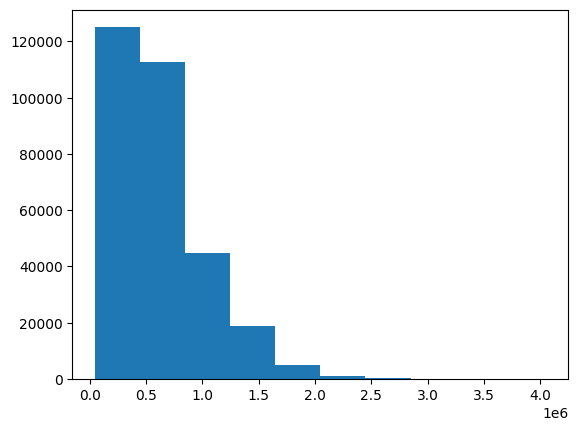

In [ ]:
# 스케일링 전 데이터 시각화(정화 완료!)
plt.hist(train_selected['AMT_CREDIT'])

In [ ]:
# 로그 변환 + 스케일링
train_selected_log = np.log1p(train_selected['AMT_CREDIT'])
train_selected_log.name = 'AMT_CREDIT_LOG'
train_selected = pd.concat([train_selected,train_selected_log],axis=1)
train_selected

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,...,income_type_Maternity leave,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Unemployed,income_type_Working,contract_type,AGE,YEARS_EMPLOYED,AMT_CREDIT_LOG
0,1,Cash loans,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,...,False,False,False,False,False,True,1,25.9,1.7,12.915581
1,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-16765,...,False,False,True,False,False,False,1,45.9,3.3,14.072865
2,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-19046,...,False,False,False,False,False,True,0,52.2,0.6,11.813037
3,0,Cash loans,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-19005,...,False,False,False,False,False,True,1,52.1,8.3,12.652947
4,0,Cash loans,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-19932,...,False,False,False,False,False,True,1,54.6,8.3,13.148033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,-9327,...,False,False,False,False,False,True,1,25.6,0.6,12.447846
307507,0,Cash loans,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,-20775,...,False,True,False,False,False,False,1,56.9,-1000.7,12.504513
307508,0,Cash loans,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,-14966,...,False,False,False,False,False,True,1,41.0,21.7,13.426408
307509,1,Cash loans,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,-11961,...,False,False,False,False,False,False,1,32.8,13.1,12.821550


In [ ]:
# 소득 로그스케일 (준영완료)
import numpy as np
import pandas as pd

# 2) Series → 이름 붙여서 DataFrame
log_income = np.log1p(train_copy['AMT_INCOME_TOTAL']).rename('AMT_INCOME_TOTAL_LOG')
log_income_df = log_income.to_frame()

print(log_income_df)
log_income_df.info()

        AMT_INCOME_TOTAL_LOG
0                  12.218500
1                  12.506181
2                  11.119898
3                  11.813037
4                  11.707678
...                      ...
307506             11.967187
307507             11.184435
307508             11.938200
307509             12.049425
307510             11.967187

[307511 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 1 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AMT_INCOME_TOTAL_LOG  307511 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [ ]:
train_selected = pd.concat([train_selected,log_income_df],axis=1)
train_selected

,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,...,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Unemployed,income_type_Working,contract_type,AGE,YEARS_EMPLOYED,AMT_CREDIT_LOG,AMT_INCOME_TOTAL_LOG
0,1,Cash loans,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,-9461,...,False,False,False,False,True,1,25.9,1.7,12.915581,12.218500
1,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,-16765,...,False,True,False,False,False,1,45.9,3.3,14.072865,12.506181
2,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,-19046,...,False,False,False,False,True,0,52.2,0.6,11.813037,11.119898
3,0,Cash loans,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,-19005,...,False,False,False,False,True,1,52.1,8.3,12.652947,11.813037
4,0,Cash loans,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,-19932,...,False,False,False,False,True,1,54.6,8.3,13.148033,11.707678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,-9327,...,False,False,False,False,True,1,25.6,0.6,12.447846,11.967187
307507,0,Cash loans,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,-20775,...,True,False,False,False,False,1,56.9,-1000.7,12.504513,11.184435
307508,0,Cash loans,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,-14966,...,False,False,False,False,True,1,41.0,21.7,13.426408,11.938200
307509,1,Cash loans,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,-11961,...,False,False,False,False,False,1,32.8,13.1,12.821550,12.049425


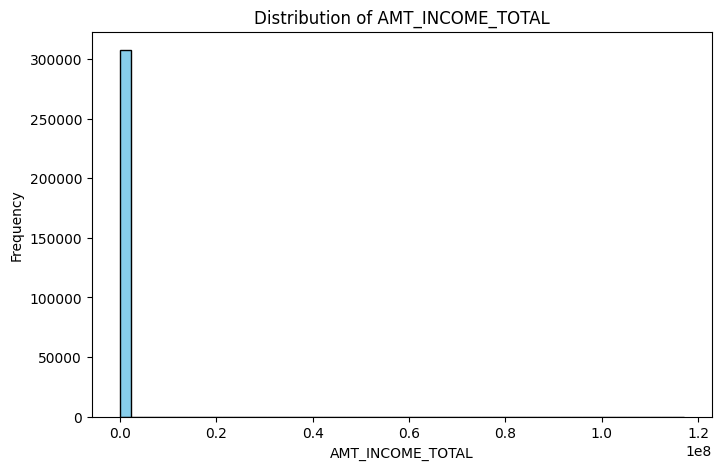

In [ ]:
#스케일링 전 시각화 (준영완료)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(train_copy['AMT_INCOME_TOTAL'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

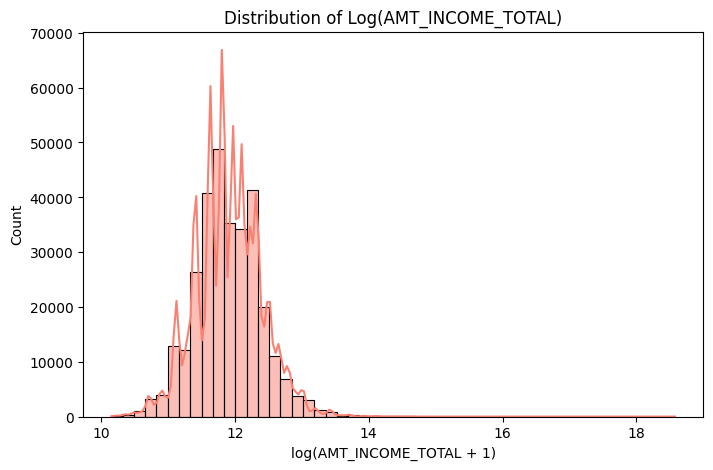

In [ ]:
# 변환된 값 시각화 (준영완료)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(log_income_df['AMT_INCOME_TOTAL_LOG'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Log(AMT_INCOME_TOTAL)')
plt.xlabel('log(AMT_INCOME_TOTAL + 1)')
plt.ylabel('Count')
plt.show()

In [ ]:
# 제외할 컬럼 리스트
drop_cols = [
    'NAME_EDUCATION_TYPE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'FLAG_OWN_CAR',
    'NAME_CONTRACT_TYPE',
    'AMT_CREDIT',
    'NAME_INCOME_TYPE',
    'AMT_INCOME_TOTAL',
    'NAME_FAMILY_STATUS',
    'FLAG_OWN_REALTY'
]

# 제외 후 새로운 데이터프레임 생성
df = train_selected.drop(columns=drop_cols, errors='ignore')

# 결과 확인
print("새로운 데이터프레임(df) 생성 완료")
print("컬럼 수:", df.shape[1])
print("컬럼 목록:")
print(list(df.columns))

새로운 데이터프레임(df) 생성 완료
컬럼 수: 21
컬럼 목록:
['TARGET', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE_ENC', 'FLAG_OWN_CAR_ENC', 'status_S', 'status_M', 'income_type_Commercial associate', 'income_type_Maternity leave', 'income_type_Pensioner', 'income_type_State servant', 'income_type_Student', 'income_type_Unemployed', 'income_type_Working', 'contract_type', 'AGE', 'YEARS_EMPLOYED', 'AMT_CREDIT_LOG', 'AMT_INCOME_TOTAL_LOG']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   TARGET                            307511 non-null  int64  
 1   AMT_ANNUITY                       307499 non-null  float64
 2   AMT_GOODS_PRICE                   307233 non-null  float64
 3   CNT_CHILDREN                      307511 non-null  int64  
 4   CNT_FAM_MEMBERS                   307509 non-null  float64
 5   NAME_EDUCATION_TYPE_ENC           307511 non-null  int64  
 6   FLAG_OWN_CAR_ENC                  307511 non-null  int64  
 7   status_S                          307511 non-null  bool   
 8   status_M                          307511 non-null  bool   
 9   income_type_Commercial associate  307511 non-null  bool   
 10  income_type_Maternity leave       307511 non-null  bool   
 11  income_type_Pensioner             307511 non-null  b

### 결측치 제거

In [ ]:
null=['AMT_ANNUITY','AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']
df[null]
#1번 컬럼: 연간 대출 상환할 액/결측치:
#2번 컬럼: 대출한 돈으로 산 물건의 가격(즉 물건을 안샀으면 0이 나옴)
#3번 컬럼: 가족 구성원 수/ 결측치:2개

# 정규분포>>평균으로 대체
# 한쪽으로 편향>>최빈값 중앙값 대체가 안정적

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS
0,24700.5,351000.0,1.0
1,35698.5,1129500.0,2.0
2,6750.0,135000.0,1.0
3,29686.5,297000.0,2.0
4,21865.5,513000.0,1.0
...,...,...,...
307506,27558.0,225000.0,1.0
307507,12001.5,225000.0,1.0
307508,29979.0,585000.0,1.0
307509,20205.0,319500.0,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   TARGET                            307511 non-null  int64  
 1   AMT_ANNUITY                       307499 non-null  float64
 2   AMT_GOODS_PRICE                   307233 non-null  float64
 3   CNT_CHILDREN                      307511 non-null  int64  
 4   CNT_FAM_MEMBERS                   307511 non-null  float64
 5   NAME_EDUCATION_TYPE_ENC           307511 non-null  int64  
 6   FLAG_OWN_CAR_ENC                  307511 non-null  int64  
 7   status_S                          307511 non-null  bool   
 8   status_M                          307511 non-null  bool   
 9   income_type_Commercial associate  307511 non-null  bool   
 10  income_type_Maternity leave       307511 non-null  bool   
 11  income_type_Pensioner             307511 non-null  b

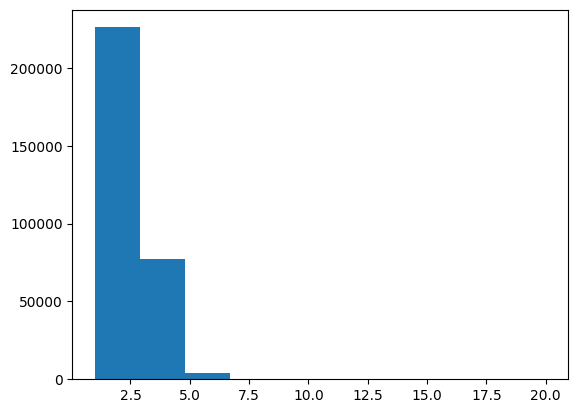

In [ ]:
# CNT_FAM_MEMBERS 결측치 최빈값으로 대체(정화완료!)
plt.hist(df['CNT_FAM_MEMBERS'])
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mode()[0], inplace=True)
df.info()

In [ ]:
# AMT_ANNUITY 결측치 비율 기반 대체(주비 완료!)
# 기준 : AMT_GOODS_PRICE
ratio = (df['AMT_ANNUITY'] / df['AMT_GOODS_PRICE']).median()

df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_GOODS_PRICE'] * ratio)

print("결측치 채우기 완료")
print("사용된 비율:", ratio)
print("남은 결측치 개수:", df['AMT_ANNUITY'].isna().sum())

결측치 채우기 완료
사용된 비율: 0.05138
남은 결측치 개수: 0


In [ ]:
#AMT_GOODS_PRICE 결측치 중앙값으로 처리(준영완료)
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)
df.info()
median_value = df['AMT_GOODS_PRICE'].median()
print("중앙값:", median_value)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   TARGET                            307511 non-null  int64  
 1   AMT_ANNUITY                       307511 non-null  float64
 2   AMT_GOODS_PRICE                   307511 non-null  float64
 3   CNT_CHILDREN                      307511 non-null  int64  
 4   CNT_FAM_MEMBERS                   307511 non-null  float64
 5   NAME_EDUCATION_TYPE_ENC           307511 non-null  int64  
 6   FLAG_OWN_CAR_ENC                  307511 non-null  int64  
 7   status_S                          307511 non-null  bool   
 8   status_M                          307511 non-null  bool   
 9   income_type_Commercial associate  307511 non-null  bool   
 10  income_type_Maternity leave       307511 non-null  bool   
 11  income_type_Pensioner             307511 non-null  b

In [ ]:
output_path = '/content/drive/MyDrive/3차_프로젝트/df.csv'
df.to_csv(output_path, index=False)

# 2단계 : 모델 구현

---



**작업일**: 10/16(목)  
**담당**: 전체, 모델별 담당  
*   준영 - SVM  
*   정화 - 로지스틱 회귀 & K-최근접
*   주비 - 의사결정트리 & 랜덤포레스트   

**목표**: 학습/검증 데이터 분리, 모델 결과 확인 + 성능 개선 시도



## 상관관계 분석

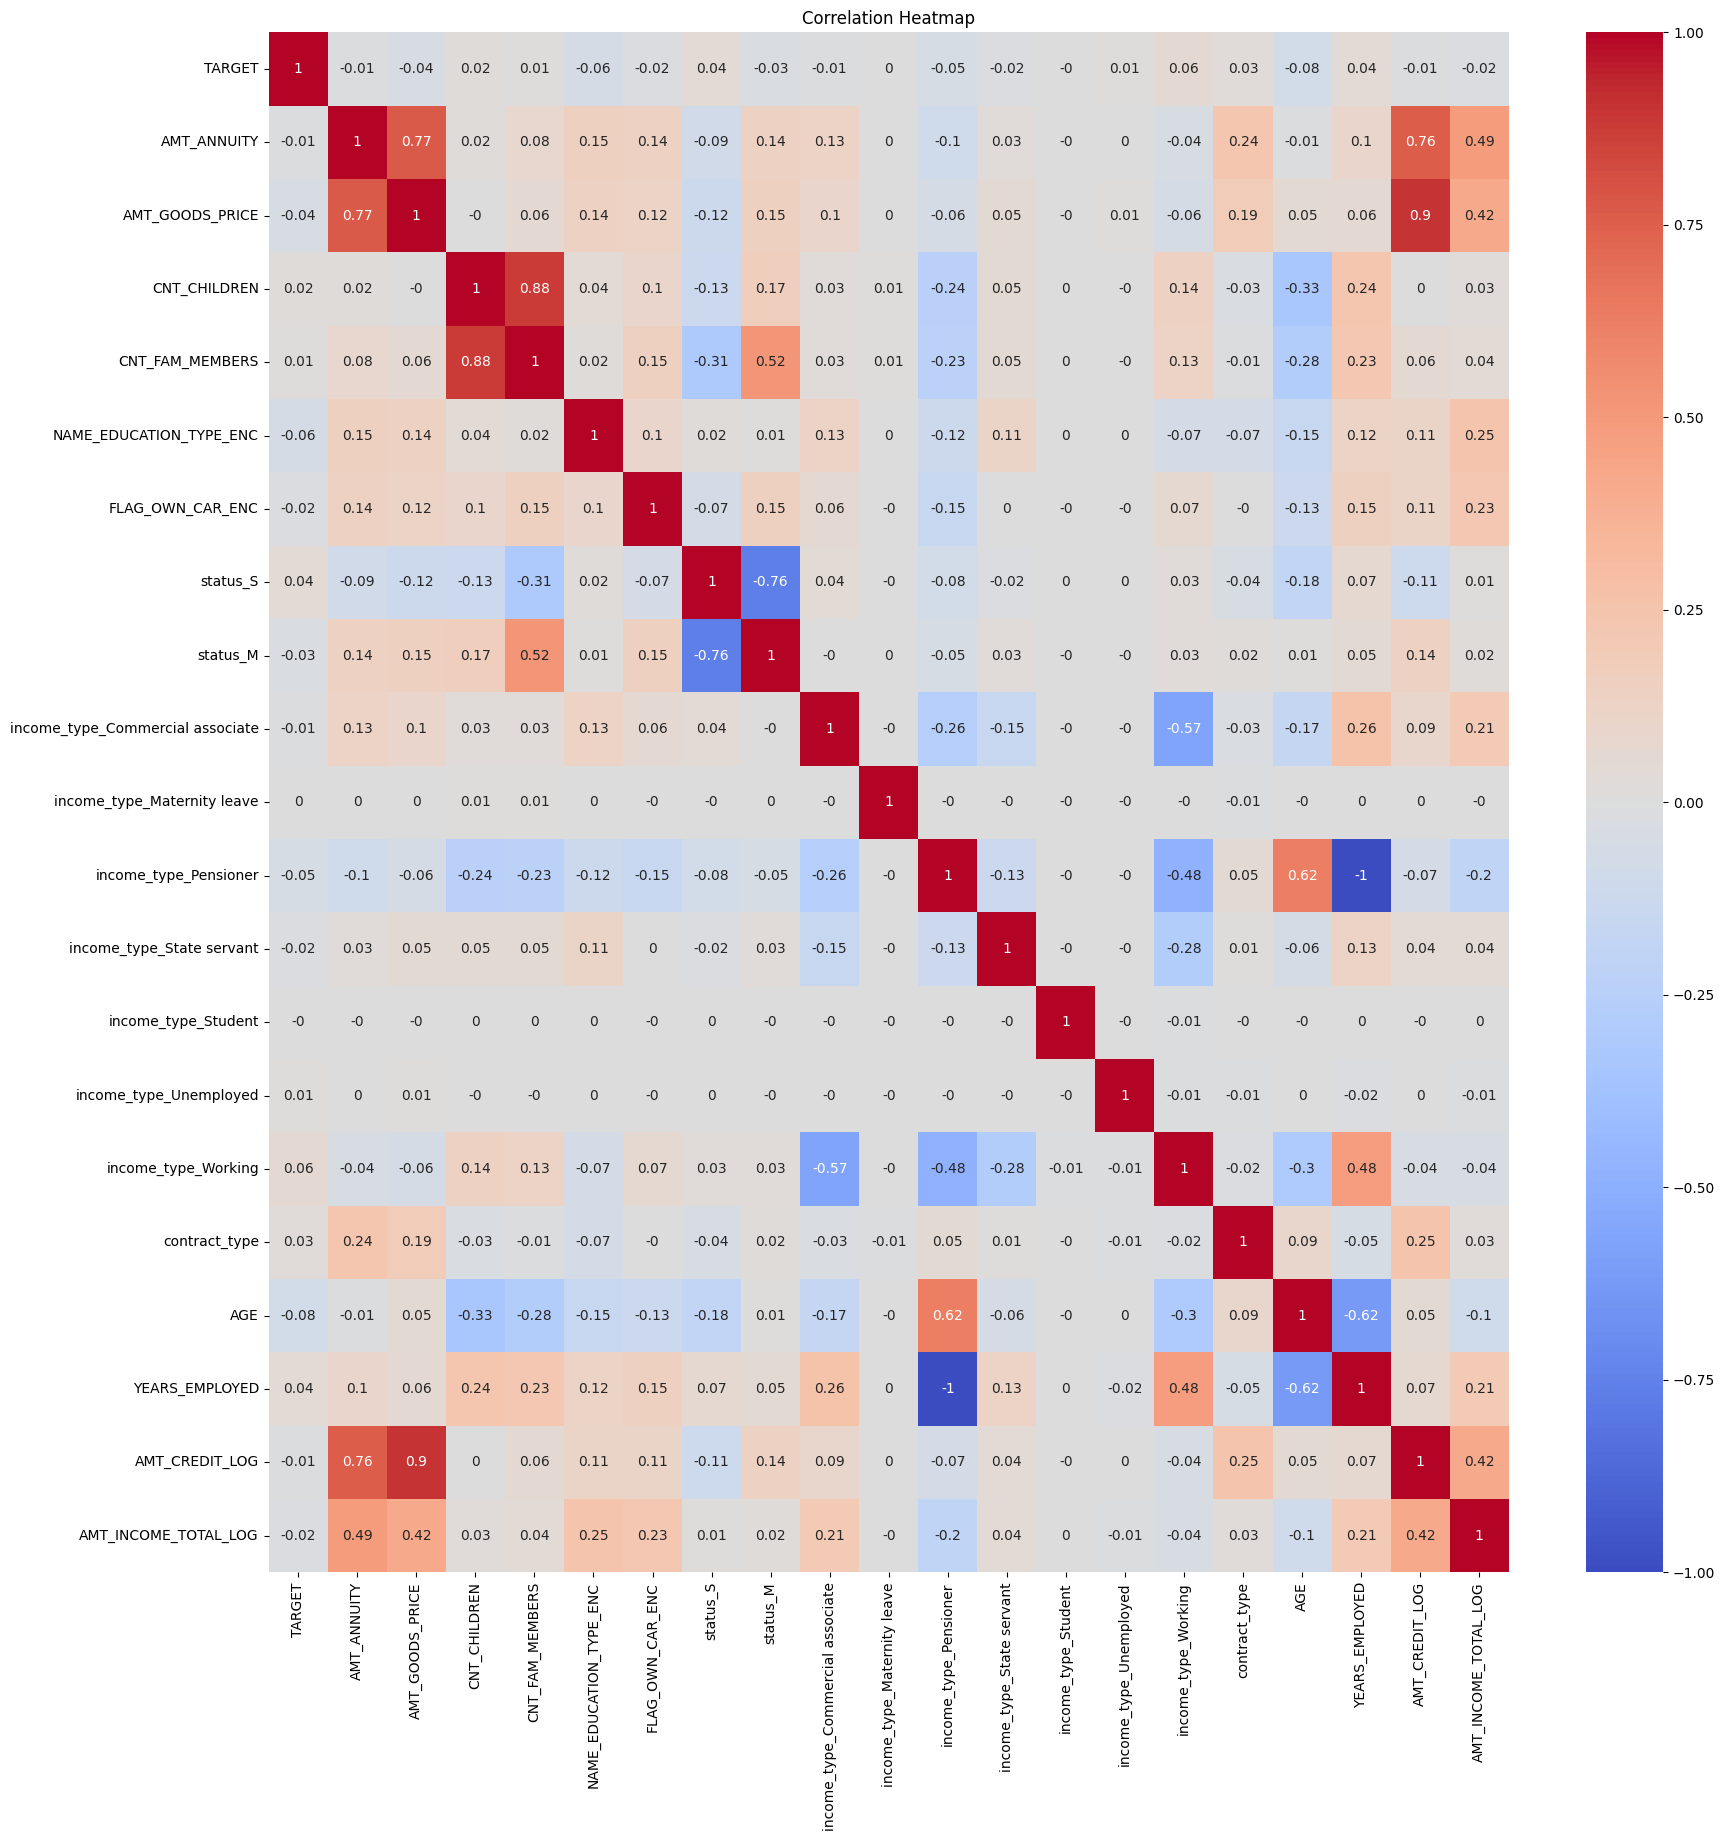

In [ ]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(20, 20))   # 그래프 크기 설정
sns.heatmap(round(corr,2), annot=True, cmap='coolwarm')  # annot=True → 숫자 표시
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix = df.corr(numeric_only=True)
high_corr = []
threshold = 0.8

for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            corr_value = corr_matrix.loc[col1, col2]
            if abs(corr_value) >= threshold:
                pair = tuple(sorted([col1, col2]))
                high_corr.append((pair[0], pair[1], corr_value))

# 3️⃣ 중복 제거 (col1-col2와 col2-col1은 동일)
high_corr = list(set(high_corr))

# 4️⃣ 정렬 (절댓값 기준 내림차순)
high_corr_sorted = sorted(high_corr, key=lambda x: abs(x[2]), reverse=True)

# 5️⃣ 보기 좋게 정리하여 출력
print("🔹 상관계수 0.8 이상인 컬럼쌍:")
for col1, col2, corr_value in high_corr_sorted:
    print(f"- {col1} ↔ {col2} : 상관계수 = {corr_value:.3f}")

# 6️⃣ 글 형태로 정리하고 싶다면
summary_text = "\n".join([f"{col1}와(과) {col2}는 상관계수가 {corr_value:.3f}로 매우 높은 상관관계를 가집니다."
                          for col1, col2, corr_value in high_corr_sorted])

print("\n📄 정리된 설명문:\n")
print(summary_text)

🔹 상관계수 0.8 이상인 컬럼쌍:
- YEARS_EMPLOYED ↔ income_type_Pensioner : 상관계수 = -1.000
- AMT_CREDIT_LOG ↔ AMT_GOODS_PRICE : 상관계수 = 0.901
- CNT_CHILDREN ↔ CNT_FAM_MEMBERS : 상관계수 = 0.879

📄 정리된 설명문:

YEARS_EMPLOYED와(과) income_type_Pensioner는 상관계수가 -1.000로 매우 높은 상관관계를 가집니다.
AMT_CREDIT_LOG와(과) AMT_GOODS_PRICE는 상관계수가 0.901로 매우 높은 상관관계를 가집니다.
CNT_CHILDREN와(과) CNT_FAM_MEMBERS는 상관계수가 0.879로 매우 높은 상관관계를 가집니다.


In [ ]:
df_cor = df.drop(['income_type_Pensioner','AMT_GOODS_PRICE','CNT_CHILDREN'], axis=1)
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   TARGET                            307511 non-null  int64  
 1   AMT_ANNUITY                       307511 non-null  float64
 2   CNT_FAM_MEMBERS                   307511 non-null  float64
 3   NAME_EDUCATION_TYPE_ENC           307511 non-null  int64  
 4   FLAG_OWN_CAR_ENC                  307511 non-null  int64  
 5   status_S                          307511 non-null  bool   
 6   status_M                          307511 non-null  bool   
 7   income_type_Commercial associate  307511 non-null  bool   
 8   income_type_Maternity leave       307511 non-null  bool   
 9   income_type_State servant         307511 non-null  bool   
 10  income_type_Student               307511 non-null  bool   
 11  income_type_Unemployed            307511 non-null  b

## 학습/검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
y = df_cor['TARGET']                     # 종속변수(Series)
X = df_cor.drop(columns=['TARGET'])      # 독립변수(DataFrame)


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # test 데이터를 20%로 분리
    random_state=42,        # 재현성을 위한 시드값
    stratify=y              # y의 비율을 유지하면서 분리
)

In [ ]:
X_train.head()

,AMT_ANNUITY,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE_ENC,FLAG_OWN_CAR_ENC,status_S,status_M,income_type_Commercial associate,income_type_Maternity leave,income_type_State servant,income_type_Student,income_type_Unemployed,income_type_Working,contract_type,AGE,YEARS_EMPLOYED,AMT_CREDIT_LOG,AMT_INCOME_TOTAL_LOG
181648,13189.5,4.0,3,0,False,True,True,False,False,False,False,False,1,33.7,2.6,12.334998,11.407576
229245,13095.0,2.0,1,1,False,True,True,False,False,False,False,False,1,42.1,0.3,11.993690,11.407576
122525,26307.0,1.0,1,0,True,False,False,False,False,False,False,True,1,52.9,4.5,13.499220,11.813037
306311,34636.5,1.0,1,0,True,False,True,False,False,False,False,False,1,48.7,4.5,13.069351,11.813037
300658,27558.0,1.0,2,0,True,False,True,False,False,False,False,False,1,23.2,2.7,12.447846,12.100718


In [ ]:
from sklearn.model_selection import train_test_split
y = df['TARGET']                     # 종속변수(Series)
X = df.drop(columns=['TARGET'])      # 독립변수(DataFrame)


X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y,
    test_size=0.2,          # test 데이터를 20%로 분리
    random_state=42,        # 재현성을 위한 시드값
    stratify=y              # y의 비율을 유지하면서 분리
)

In [ ]:
X_train2.head()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE_ENC,FLAG_OWN_CAR_ENC,status_S,status_M,income_type_Commercial associate,income_type_Maternity leave,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Unemployed,income_type_Working,contract_type,AGE,YEARS_EMPLOYED,AMT_CREDIT_LOG,AMT_INCOME_TOTAL_LOG
181648,13189.5,180000.0,2,4.0,3,0,False,True,True,False,False,False,False,False,False,1,33.7,2.6,12.334998,11.407576
229245,13095.0,135000.0,0,2.0,1,1,False,True,True,False,False,False,False,False,False,1,42.1,0.3,11.993690,11.407576
122525,26307.0,553500.0,0,1.0,1,0,True,False,False,False,False,False,False,False,True,1,52.9,4.5,13.499220,11.813037
306311,34636.5,391500.0,0,1.0,1,0,True,False,True,False,False,False,False,False,False,1,48.7,4.5,13.069351,11.813037
300658,27558.0,225000.0,0,1.0,2,0,True,False,True,False,False,False,False,False,False,1,23.2,2.7,12.447846,12.100718


In [ ]:
output_path = '/content/drive/MyDrive/3차_프로젝트/X_test2.csv'
X_test2.to_csv(output_path, index=False)

In [ ]:
output_path = '/content/drive/MyDrive/3차_프로젝트/y_test2.csv'
y_test2.to_csv(output_path, index=False)

In [ ]:
y_test2

,TARGET
256571,0
191493,0
103497,0
130646,0
211898,0
...,...
16213,0
294620,0
234384,0
149027,1


In [ ]:
y_train2

,TARGET
181648,0
229245,0
122525,1
306311,1
300658,0
...,...
31304,0
121193,0
248504,0
175469,1


## 모델 학습

#### Random Forest 모델 개발
*   담당 : 박주비



📊 Random Forest 모델 학습 및 평가

하이퍼파라미터:
  ├─ n_estimators: 100
  ├─ max_depth: 20
  ├─ min_samples_split: 150
  ├─ min_samples_leaf: 25
  ├─ max_features: sqrt
  └─ class_weight: balanced

학습 데이터: (246008, 20)
테스트 데이터: (61503, 20)

🔄 모델 학습 중...
✅ 학습 완료! 소요 시간: 30.60초
✅ 훈련 정확도: 0.7682

🎯 예측 (Threshold = 0.38)
✅ 예측 완료! (Threshold: 0.38)

📊 최종 모델 성능 평가 (Random Forest)

🎯 전체 지표:
  ├─ Accuracy:  0.4815 (48.15%)
  └─ ROC-AUC:   0.6642

📈 클래스별 성능:
  [Class 0 - 정상]
    ├─ Precision: 0.9536 (95.36%)
    ├─ Recall:    0.4583 (45.83%)
    ├─ F1-Score:  0.6190
    ├─ Accuracy:  0.4815 (48.15%)
    └─ ROC-AUC:   0.6642

  [Class 1 - 불이행]
    ├─ Precision: 0.1079 (10.79%)
    ├─ Recall:    0.7460 (74.60%)
    ├─ F1-Score:  0.1885
    ├─ Accuracy:  0.4815 (48.15%)
    └─ ROC-AUC:   0.6642

🔢 혼동 행렬:
    실제\예측    정상    불이행
    정상       25910   30628
    불이행      1261    3704

❌ 놓친 불이행 고객 수(FN): 1261
⚠️  정상 고객 오분류(FP): 30628


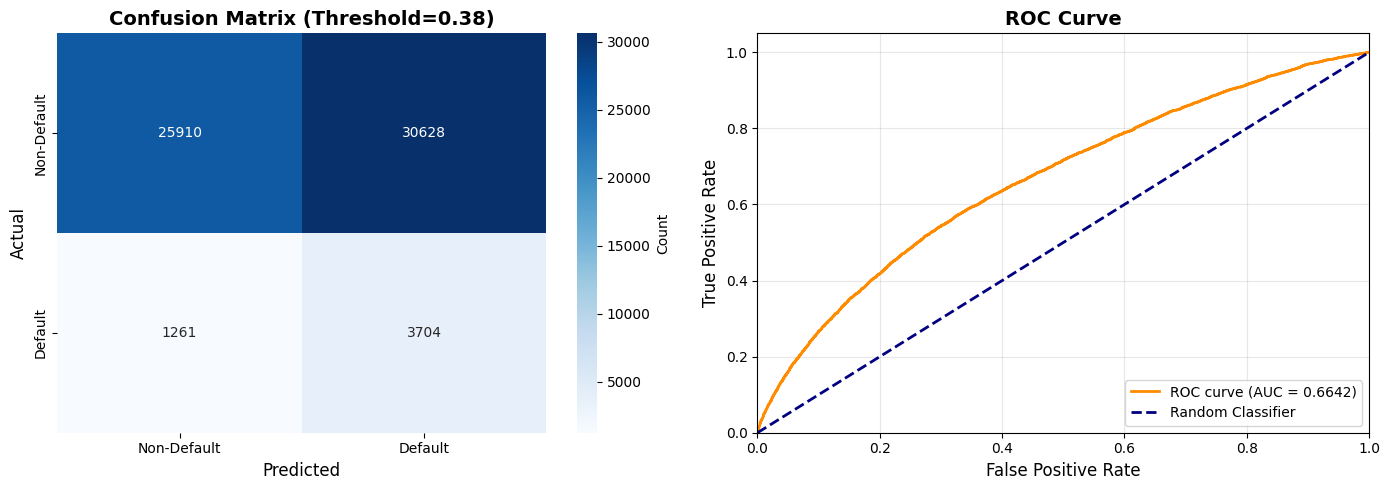


📋 성능 지표 요약표
지표                   Class 0 (정상)         Class 1 (불이행)       
--------------------------------------------------------------------------------
Recall                            45.83%              74.60%
Precision                         95.36%              10.79%
F1-Score                         0.6190             0.1885
--------------------------------------------------------------------------------
Accuracy                          48.15%
ROC-AUC                          0.6642
학습 시간                            30.60초
Threshold                          0.38

📊 특성 중요도 (Top 10)
                Feature  Importance
                    AGE    0.169615
         YEARS_EMPLOYED    0.146000
            AMT_ANNUITY    0.137095
         AMT_CREDIT_LOG    0.129677
        AMT_GOODS_PRICE    0.126004
   AMT_INCOME_TOTAL_LOG    0.082747
NAME_EDUCATION_TYPE_ENC    0.059845
    income_type_Working    0.024171
          contract_type    0.022127
        CNT_FAM_MEMBERS    0.020141

✅ 상위

In [67]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_fscore_support
)

# ===================================
# 한글 폰트 경고 방지 설정
# ===================================
import platform
import matplotlib.font_manager as fm
import warnings

def set_korean_font():
    """시스템에 맞는 한글 폰트 자동 설정"""
    system = platform.system()

    if system == 'Windows':
        font_list = ['Malgun Gothic', 'NanumGothic', 'Gulim']
    elif system == 'Darwin':  # macOS
        font_list = ['AppleGothic', 'NanumGothic']
    else:  # Linux
        font_list = ['NanumGothic', 'NanumBarunGothic', 'DejaVu Sans']

    # 사용 가능한 폰트 찾기
    available_fonts = [f.name for f in fm.fontManager.ttflist]

    for font in font_list:
        if font in available_fonts:
            plt.rcParams['font.family'] = font
            return

    # 한글 폰트가 없으면 경고 무시
    warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# 한글 폰트 설정 실행
set_korean_font()
plt.rcParams['axes.unicode_minus'] = False

# ===================================
# 1️⃣ 모델 정의 및 학습
# ===================================
print("=" * 80)
print("📊 Random Forest 모델 학습 및 평가")
print("=" * 80)

model = RandomForestClassifier(
    n_estimators=100,           # 트리 개수: 100개
    max_depth=20,               # 최대 깊이: 20단계
    min_samples_split=150,      # 분할 최소 샘플: 150개
    min_samples_leaf=25,        # 리프 최소 샘플: 25개
    max_features='sqrt',        # 분할 시 고려 특성: √(전체 특성 수)
    class_weight='balanced',    # 클래스 가중치: 불균형 자동 조정
    random_state=42,            # 재현성: 동일한 결과 보장
    n_jobs=-1                   # 병렬 처리: 모든 CPU 코어 사용
)

print("\n하이퍼파라미터:")
print(f"  ├─ n_estimators: {model.n_estimators}")
print(f"  ├─ max_depth: {model.max_depth}")
print(f"  ├─ min_samples_split: {model.min_samples_split}")
print(f"  ├─ min_samples_leaf: {model.min_samples_leaf}")
print(f"  ├─ max_features: {model.max_features}")
print(f"  └─ class_weight: {model.class_weight}")

print(f"\n학습 데이터: {X_train2.shape}")
print(f"테스트 데이터: {X_test2.shape}")

print("\n🔄 모델 학습 중...")
start_time = time.time()
model.fit(X_train2, y_train2)
train_elapsed = time.time() - start_time
train_accuracy = model.score(X_train2, y_train2)
print(f"✅ 학습 완료! 소요 시간: {train_elapsed:.2f}초")
print(f"✅ 훈련 정확도: {train_accuracy:.4f}\n")

# ===================================
# 2️⃣ 예측 (Threshold = 0.38)
# ===================================
print("=" * 80)
print("🎯 예측 (Threshold = 0.38)")
print("=" * 80)

y_pred_proba = model.predict_proba(X_test2)[:, 1]
threshold = 0.38
y_pred = (y_pred_proba >= threshold).astype(int)

print(f"✅ 예측 완료! (Threshold: {threshold})")

# ===================================
# 3️⃣ 성능 평가
# ===================================
print("\n" + "=" * 80)
print("📊 최종 모델 성능 평가 (Random Forest)")
print("=" * 80)

# 전체 지표
accuracy = accuracy_score(y_test2, y_pred)
roc_auc = roc_auc_score(y_test2, y_pred_proba)

# 클래스별 지표
precision, recall, f1, support = precision_recall_fscore_support(
    y_test2, y_pred, labels=[0, 1], zero_division=0
)

# 혼동 행렬
cm = confusion_matrix(y_test2, y_pred)

print(f"\n🎯 전체 지표:")
print(f"  ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n📈 클래스별 성능:")
print(f"  [Class 0 - 정상]")
print(f"    ├─ Precision: {precision[0]:.4f} ({precision[0]*100:.2f}%)")
print(f"    ├─ Recall:    {recall[0]:.4f} ({recall[0]*100:.2f}%)")
print(f"    ├─ F1-Score:  {f1[0]:.4f}")
print(f"    ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"    └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n  [Class 1 - 불이행]")
print(f"    ├─ Precision: {precision[1]:.4f} ({precision[1]*100:.2f}%)")
print(f"    ├─ Recall:    {recall[1]:.4f} ({recall[1]*100:.2f}%)")
print(f"    ├─ F1-Score:  {f1[1]:.4f}")
print(f"    ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"    └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n🔢 혼동 행렬:")
print(f"    실제\\예측    정상    불이행")
print(f"    정상      {cm[0,0]:6d}  {cm[0,1]:6d}")
print(f"    불이행    {cm[1,0]:6d}  {cm[1,1]:6d}")
print(f"\n❌ 놓친 불이행 고객 수(FN): {cm[1,0]}")
print(f"⚠️  정상 고객 오분류(FP): {cm[0,1]}")
print("=" * 80)

# ===================================
# 4️⃣ 시각화
# ===================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 📌 혼동 행렬 히트맵
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'],
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix (Threshold=0.38)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12)

# 📌 ROC 곡선
ax2 = axes[1]
fpr, tpr, thresholds_roc = roc_curve(y_test2, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================
# 5️⃣ 성능 요약 표
# ===================================
print("\n📋 성능 지표 요약표")
print("=" * 80)
print(f"{'지표':<20} {'Class 0 (정상)':<20} {'Class 1 (불이행)':<20}")
print("-" * 80)
print(f"{'Recall':<20} {recall[0]*100:>18.2f}% {recall[1]*100:>18.2f}%")
print(f"{'Precision':<20} {precision[0]*100:>18.2f}% {precision[1]*100:>18.2f}%")
print(f"{'F1-Score':<20} {f1[0]:>18.4f} {f1[1]:>18.4f}")
print("-" * 80)
print(f"{'Accuracy':<20} {accuracy*100:>18.2f}%")
print(f"{'ROC-AUC':<20} {roc_auc:>18.4f}")
print(f"{'학습 시간':<20} {train_elapsed:>17.2f}초")
print(f"{'Threshold':<20} {threshold:>18.2f}")
print("=" * 80)

# ===================================
# 6️⃣ 특성 중요도 (Top 10)
# ===================================
print("\n📊 특성 중요도 (Top 10)")
print("=" * 80)

feature_importance = pd.DataFrame({
    'Feature': X_train2.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print(feature_importance.to_string(index=False))
print(f"\n✅ 상위 5개 특성 설명력: {feature_importance['Importance'].head(5).sum()*100:.2f}%")
print("=" * 80)

### 로지스틱 회귀 모델 개발
*   담당 : 이정화

📊 데이터 전처리
✅ 스케일링 완료
   학습 데이터: (246008, 17)
   테스트 데이터: (61503, 17)

🔍 영향력 높은 변수 선택 (|coefficient| >= 5)
                         Columns  Coefficient
             income_type_Working    20.588736
income_type_Commercial associate    17.330877
       income_type_State servant    10.514413
             income_type_Student    -9.877455
                  YEARS_EMPLOYED   -15.700282

✅ 선택된 변수: 5개

📊 최종 모델 학습

하이퍼파라미터:
  ├─ C: 100
  ├─ max_iter: 1000
  └─ class_weight: balanced

학습 데이터: (246008, 5)
테스트 데이터: (61503, 5)

🔄 모델 학습 중...
✅ 학습 완료! 소요 시간: 1.28초
✅ 훈련 정확도: 0.5064

🎯 예측 (Threshold = 0.45)
✅ 예측 완료! (Threshold: 0.45)

📊 최종 모델 성능 평가 (로지스틱 회귀)

🎯 전체 지표:
  ├─ Accuracy:  0.3900 (39.00%)
  └─ ROC-AUC:   0.6046

📈 클래스별 성능:
  [Class 0 - 정상]
    ├─ Precision: 0.9475 (94.75%)
    ├─ Recall:    0.3562 (35.62%)
    ├─ F1-Score:  0.5178
    ├─ Accuracy:  0.3900 (39.00%)
    └─ ROC-AUC:   0.6046

  [Class 1 - 불이행]
    ├─ Precision: 0.0956 (9.56%)
    ├─ Recall:    0.7750 (77.50%)
    ├─ F1-Score:  0.

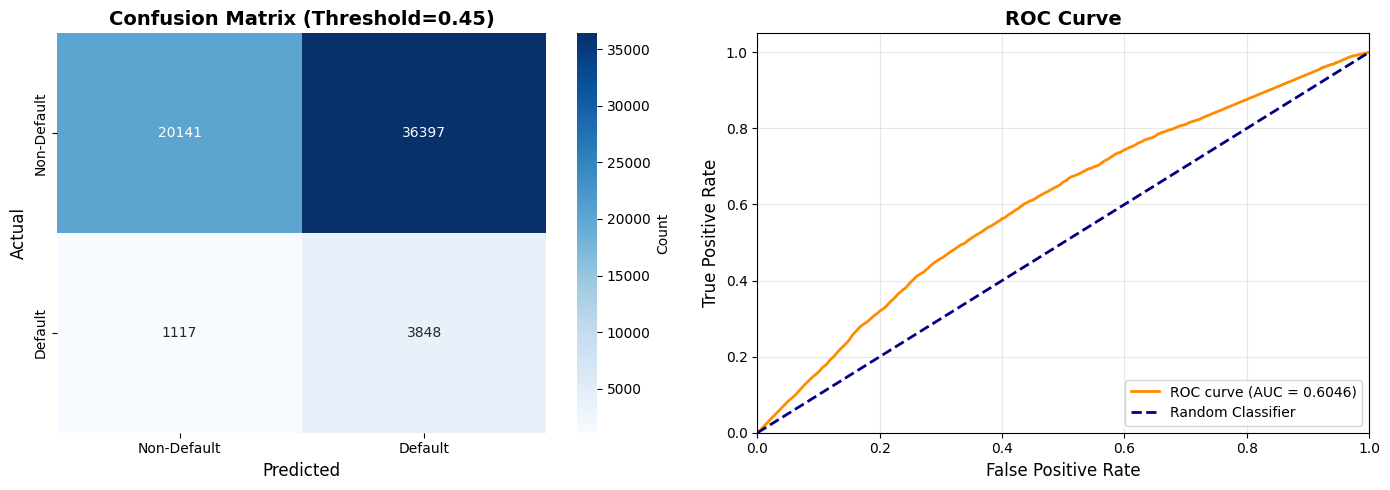


📋 성능 지표 요약표
지표                   Class 0 (정상)         Class 1 (불이행)       
--------------------------------------------------------------------------------
Recall                            35.62%              77.50%
Precision                         94.75%               9.56%
F1-Score                         0.5178             0.1702
--------------------------------------------------------------------------------
Accuracy                          39.00%
ROC-AUC                          0.6046
학습 시간                             1.28초
Threshold                          0.45
선택 변수 수                               5개


In [66]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_fscore_support
)

# ===================================
# 한글 폰트 경고 방지 설정
# ===================================
import platform
import matplotlib.font_manager as fm
import warnings

def set_korean_font():
    """시스템에 맞는 한글 폰트 자동 설정"""
    system = platform.system()

    if system == 'Windows':
        font_list = ['Malgun Gothic', 'NanumGothic', 'Gulim']
    elif system == 'Darwin':  # macOS
        font_list = ['AppleGothic', 'NanumGothic']
    else:  # Linux
        font_list = ['NanumGothic', 'NanumBarunGothic', 'DejaVu Sans']

    # 사용 가능한 폰트 찾기
    available_fonts = [f.name for f in fm.fontManager.ttflist]

    for font in font_list:
        if font in available_fonts:
            plt.rcParams['font.family'] = font
            return

    # 한글 폰트가 없으면 경고 무시
    warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# 한글 폰트 설정 실행
set_korean_font()
plt.rcParams['axes.unicode_minus'] = False

# ===================================
# 1️⃣ 데이터 전처리
# ===================================
print("=" * 80)
print("📊 데이터 전처리")
print("=" * 80)

# StandardScaler 적용
scaler = StandardScaler()
X_train_columns = X_train.columns
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_columns)

X_test_columns = X_test.columns
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_columns)

print(f"✅ 스케일링 완료")
print(f"   학습 데이터: {X_train_scaled.shape}")
print(f"   테스트 데이터: {X_test_scaled.shape}")

# ===================================
# 2️⃣ 변수 선택 (영향력 높은 변수)
# ===================================
print("\n" + "=" * 80)
print("🔍 영향력 높은 변수 선택 (|coefficient| >= 5)")
print("=" * 80)

# 임시 모델로 변수 선택
temp_model = LogisticRegression(max_iter=1000, C=100, class_weight='balanced')
temp_model.fit(X_train_scaled, y_train)

coefficients = temp_model.coef_[0]
selected_features = X_train_scaled.columns[np.abs(coefficients) >= 5]

# 선택된 변수 정보
sel_df = pd.DataFrame({
    'Columns': selected_features,
    'Coefficient': coefficients[np.abs(coefficients) >= 5]
})
print(sel_df.sort_values(by='Coefficient', ascending=False).to_string(index=False))
print(f"\n✅ 선택된 변수: {len(selected_features)}개")

# 선택된 변수로 데이터셋 재구성
X_train_sel = X_train_scaled[selected_features]
X_test_sel = X_test_scaled[selected_features]

# ===================================
# 3️⃣ 최종 모델 학습
# ===================================
print("\n" + "=" * 80)
print("📊 최종 모델 학습")
print("=" * 80)

model = LogisticRegression(
    max_iter=1000,
    C=100,
    class_weight='balanced',
    random_state=42
)

print("\n하이퍼파라미터:")
print(f"  ├─ C: {model.C}")
print(f"  ├─ max_iter: {model.max_iter}")
print(f"  └─ class_weight: {model.class_weight}")

print(f"\n학습 데이터: {X_train_sel.shape}")
print(f"테스트 데이터: {X_test_sel.shape}")

print("\n🔄 모델 학습 중...")
start_time = time.time()
model.fit(X_train_sel, y_train)
train_elapsed = time.time() - start_time
train_accuracy = model.score(X_train_sel, y_train)
print(f"✅ 학습 완료! 소요 시간: {train_elapsed:.2f}초")
print(f"✅ 훈련 정확도: {train_accuracy:.4f}\n")

# ===================================
# 4️⃣ 예측 (Threshold = 0.45)
# ===================================
print("=" * 80)
print("🎯 예측 (Threshold = 0.45)")
print("=" * 80)

y_pred_proba = model.predict_proba(X_test_sel)[:, 1]
threshold = 0.45
y_pred = (y_pred_proba >= threshold).astype(int)

print(f"✅ 예측 완료! (Threshold: {threshold})")

# ===================================
# 5️⃣ 성능 평가
# ===================================
print("\n" + "=" * 80)
print("📊 최종 모델 성능 평가 (로지스틱 회귀)")
print("=" * 80)

# 전체 지표
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 클래스별 지표
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred, labels=[0, 1], zero_division=0
)

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)

print(f"\n🎯 전체 지표:")
print(f"  ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n📈 클래스별 성능:")
print(f"  [Class 0 - 정상]")
print(f"    ├─ Precision: {precision[0]:.4f} ({precision[0]*100:.2f}%)")
print(f"    ├─ Recall:    {recall[0]:.4f} ({recall[0]*100:.2f}%)")
print(f"    ├─ F1-Score:  {f1[0]:.4f}")
print(f"    ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"    └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n  [Class 1 - 불이행]")
print(f"    ├─ Precision: {precision[1]:.4f} ({precision[1]*100:.2f}%)")
print(f"    ├─ Recall:    {recall[1]:.4f} ({recall[1]*100:.2f}%)")
print(f"    ├─ F1-Score:  {f1[1]:.4f}")
print(f"    ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"    └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n🔢 혼동 행렬:")
print(f"    실제\\예측    정상    불이행")
print(f"    정상      {cm[0,0]:6d}  {cm[0,1]:6d}")
print(f"    불이행    {cm[1,0]:6d}  {cm[1,1]:6d}")
print(f"\n❌ 놓친 불이행 고객 수(FN): {cm[1,0]}")
print(f"⚠️  정상 고객 오분류(FP): {cm[0,1]}")
print("=" * 80)

# ===================================
# 6️⃣ 시각화
# ===================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 📌 혼동 행렬 히트맵
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'],
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix (Threshold=0.45)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12)

# 📌 ROC 곡선
ax2 = axes[1]
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================
# 7️⃣ 성능 요약 표
# ===================================
print("\n📋 성능 지표 요약표")
print("=" * 80)
print(f"{'지표':<20} {'Class 0 (정상)':<20} {'Class 1 (불이행)':<20}")
print("-" * 80)
print(f"{'Recall':<20} {recall[0]*100:>18.2f}% {recall[1]*100:>18.2f}%")
print(f"{'Precision':<20} {precision[0]*100:>18.2f}% {precision[1]*100:>18.2f}%")
print(f"{'F1-Score':<20} {f1[0]:>18.4f} {f1[1]:>18.4f}")
print("-" * 80)
print(f"{'Accuracy':<20} {accuracy*100:>18.2f}%")
print(f"{'ROC-AUC':<20} {roc_auc:>18.4f}")
print(f"{'학습 시간':<20} {train_elapsed:>17.2f}초")
print(f"{'Threshold':<20} {threshold:>18.2f}")
print(f"{'선택 변수 수':<20} {len(selected_features):>18d}개")
print("=" * 80)

### SVM 모델 개발
*   담당 : 고준영


✅ 훈련 완료! 소요 시간: 118.35초
✅ 훈련 정확도: 0.1994

📊 최종 모델 성능 평가 (SVM with class_weight={0:1, 1:3.5})

🎯 전체 지표:
  ├─ Accuracy:  0.2023 (20.23%)
  └─ ROC-AUC:   0.5796

📈 클래스별 성능:
  [Class 0 - 정상]
    ├─ Precision: 0.9534 (95.34%)
    ├─ Recall:    0.1390 (13.90%)
    ├─ F1-Score:  0.2427
    ├─ Accuracy:  0.2023 (20.23%)
    └─ ROC-AUC:   0.5796

  [Class 1 - 불이행]
    ├─ Precision: 0.0860 (8.60%)
    ├─ Recall:    0.9227 (92.27%)
    ├─ F1-Score:  0.1574
    ├─ Accuracy:  0.2023 (20.23%)
    └─ ROC-AUC:   0.5796

🔢 혼동 행렬:
    실제\예측    정상    불이행
    정상        7860   48678
    불이행       384    4581

❌ 놓친 불이행 고객 수(FN): 384
⚠️  정상 고객 오분류(FP): 48678
⏱️  학습 시간: 118.35초


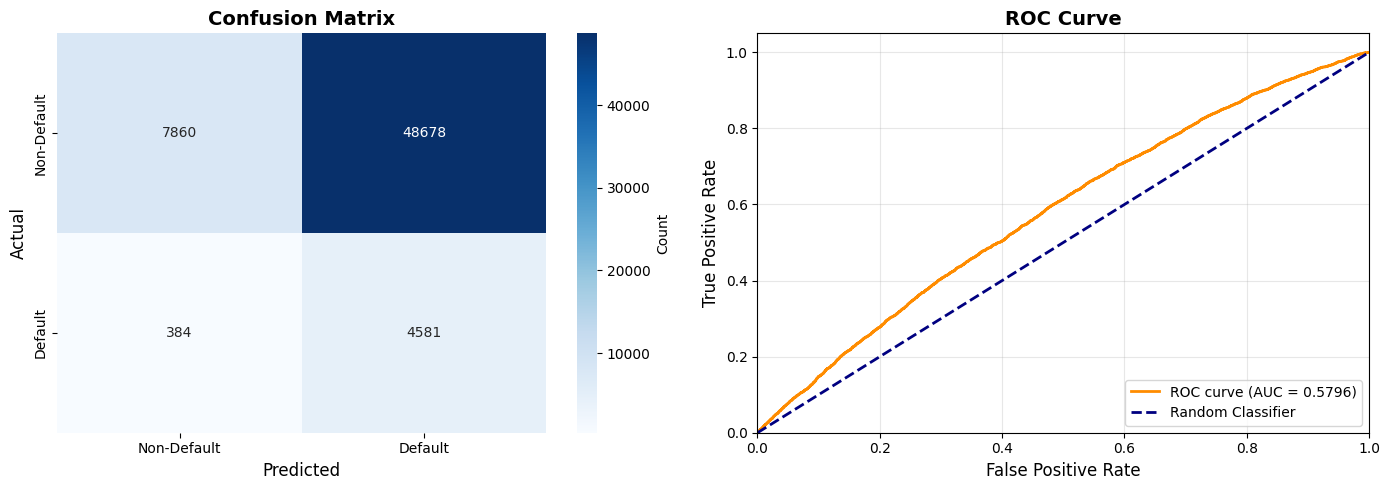


📋 성능 지표 요약표
지표                   Class 0 (정상)         Class 1 (불이행)       
------------------------------------------------------------
Recall                            13.90%              92.27%
Precision                         95.34%               8.60%
F1-Score                         0.2427             0.1574
------------------------------------------------------------
Accuracy                          20.23%
ROC-AUC                          0.5796
학습 시간                           118.35초


In [64]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_fscore_support
)

# 그래프 스타일 설정 (한글 폰트 제거)
plt.rcParams['axes.unicode_minus'] = False

# 한글 폰트 경고 방지 - 시스템에 맞는 폰트 자동 설정
import platform
import matplotlib.font_manager as fm

def set_korean_font():
    """시스템에 맞는 한글 폰트 자동 설정"""
    system = platform.system()

    if system == 'Windows':
        font_list = ['Malgun Gothic', 'NanumGothic', 'Gulim']
    elif system == 'Darwin':  # macOS
        font_list = ['AppleGothic', 'NanumGothic']
    else:  # Linux
        font_list = ['NanumGothic', 'NanumBarunGothic', 'DejaVu Sans']

    # 사용 가능한 폰트 찾기
    available_fonts = [f.name for f in fm.fontManager.ttflist]

    for font in font_list:
        if font in available_fonts:
            plt.rcParams['font.family'] = font
            return

    # 한글 폰트가 없으면 기본 폰트 사용 (경고 무시)
    import warnings
    warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# 한글 폰트 설정 실행
set_korean_font()

# ===================================
# 1️⃣ 데이터 전처리
# ===================================
X_train2 = X_train2.copy()
X_test2 = X_test2.copy()
for df in [X_train2, X_test2]:
    for c in df.select_dtypes(include=["bool"]).columns:
        df[c] = df[c].astype(int)

X_train2 = X_train2.dropna()
y_train = y_train.loc[X_train2.index]

X_test2 = X_test2.dropna()
y_test = y_test.loc[X_test2.index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

# ===================================
# 2️⃣ SVM 모델 학습
# ===================================
model = SVC(
    kernel='linear',            # 커널 함수: 선형 커널 사용
    C=1.0,                      # 규제 강도: 일반화와 성능의 균형
    tol=1e-3,                   # 수렴 허용 오차: 0.001
    max_iter=10000,             # 최대 반복 횟수: 10,000회
    class_weight={0:1, 1:3.5},  # 클래스 가중치: 불이행(1)에 3.5배 가중
    shrinking=True,             # Shrinking 휴리스틱: 학습 속도 최적화
    cache_size=2000,            # 캐시 크기: 2000MB
    random_state=42             # 재현성: 동일한 결과 보장
)

start_time = time.time()
model.fit(X_train_scaled, y_train.values.ravel())
train_elapsed = time.time() - start_time
train_accuracy = model.score(X_train_scaled, y_train)
print(f"✅ 훈련 완료! 소요 시간: {train_elapsed:.2f}초")
print(f"✅ 훈련 정확도: {train_accuracy:.4f}\n")

# ===================================
# 3️⃣ 예측 및 평가 지표 계산
# ===================================
y_pred = model.predict(X_test_scaled)
y_scores = model.decision_function(X_test_scaled)

# 전체 지표
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_scores)

# 클래스별 지표
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred, labels=[0, 1], zero_division=0
)

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)

# ===================================
# 4️⃣ 결과 출력
# ===================================
print("=" * 60)
print("📊 최종 모델 성능 평가 (SVM with class_weight={0:1, 1:3.5})")
print("=" * 60)
print(f"\n🎯 전체 지표:")
print(f"  ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n📈 클래스별 성능:")
print(f"  [Class 0 - 정상]")
print(f"    ├─ Precision: {precision[0]:.4f} ({precision[0]*100:.2f}%)")
print(f"    ├─ Recall:    {recall[0]:.4f} ({recall[0]*100:.2f}%)")
print(f"    ├─ F1-Score:  {f1[0]:.4f}")
print(f"    ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"    └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n  [Class 1 - 불이행]")
print(f"    ├─ Precision: {precision[1]:.4f} ({precision[1]*100:.2f}%)")
print(f"    ├─ Recall:    {recall[1]:.4f} ({recall[1]*100:.2f}%)")
print(f"    ├─ F1-Score:  {f1[1]:.4f}")
print(f"    ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"    └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n🔢 혼동 행렬:")
print(f"    실제\\예측    정상    불이행")
print(f"    정상      {cm[0,0]:6d}  {cm[0,1]:6d}")
print(f"    불이행    {cm[1,0]:6d}  {cm[1,1]:6d}")
print(f"\n❌ 놓친 불이행 고객 수(FN): {cm[1,0]}")
print(f"⚠️  정상 고객 오분류(FP): {cm[0,1]}")
print(f"⏱️  학습 시간: {train_elapsed:.2f}초")
print("=" * 60)

# ===================================
# 5️⃣ 시각화
# ===================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 📌 혼동 행렬 히트맵
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'],
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12)

# 📌 ROC 곡선
ax2 = axes[1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
ax2.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================
# 6️⃣ 성능 요약 표
# ===================================
print("\n📋 성능 지표 요약표")
print("=" * 60)
print(f"{'지표':<20} {'Class 0 (정상)':<20} {'Class 1 (불이행)':<20}")
print("-" * 60)
print(f"{'Recall':<20} {recall[0]*100:>18.2f}% {recall[1]*100:>18.2f}%")
print(f"{'Precision':<20} {precision[0]*100:>18.2f}% {precision[1]*100:>18.2f}%")
print(f"{'F1-Score':<20} {f1[0]:>18.4f} {f1[1]:>18.4f}")
print("-" * 60)
print(f"{'Accuracy':<20} {accuracy*100:>18.2f}%")
print(f"{'ROC-AUC':<20} {roc_auc:>18.4f}")
print(f"{'학습 시간':<20} {train_elapsed:>17.2f}초")
print("=" * 60)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time

# 1) 복사 및 bool -> int (train/test 모두)
X_train2 = X_train2.copy()
X_test2  = X_test2.copy()

bool_cols_train = list(X_train2.select_dtypes(include=["bool"]).columns)
bool_cols_test  = list(X_test2.select_dtypes(include=["bool"]).columns)
bool_cols = sorted(set(bool_cols_train) | set(bool_cols_test))

for c in bool_cols:
    if c in X_train2.columns:
        X_train2[c] = X_train2[c].astype(int)
    if c in X_test2.columns:
        X_test2[c] = X_test2[c].astype(int)

# 2) (선택) 결측치 행 제거 시에는 y_train2 인덱스도 맞추기
# X_train2 = X_train2.dropna()
# y_train2 = y_train2.loc[X_train2.index]

# 3) 스케일링 (train으로 fit, test는 transform만)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled  = scaler.transform(X_test2)

# 4) SVM 모델 정의
model = SVC(
    C=1,
    kernel='linear',
    tol=1e-3,
    max_iter=10000,
    class_weight={0:1, 1:3},
    shrinking=True,
    cache_size=2000,
    probability=False,
    random_state=42
)

# 5) 학습 및 예측/평가 (y_train2 / y_test2 사용)
start = time.time()
model.fit(X_train_scaled, y_train.values.ravel())
print(f"훈련 완료! 소요 시간: {time.time() - start:.2f}초")

y_pred_train = model.predict(X_train_scaled)
y_pred_test  = model.predict(X_test_scaled)

print("테스트 정확도:", accuracy_score(y_test2, y_pred_test))
print(classification_report(y_test2, y_pred_test))

훈련 완료! 소요 시간: 150.41초
테스트 정확도: 0.24958132123636245
              precision    recall  f1-score   support

           0       0.95      0.19      0.32     56538
           1       0.09      0.88      0.16      4965

    accuracy                           0.25     61503
   macro avg       0.52      0.54      0.24     61503
weighted avg       0.88      0.25      0.31     61503



# 3단계 : 최종 모델 선정
*   SVM 모델


### 최종 모델 평가

✅ 훈련 완료! 소요 시간: 119.60초
✅ 훈련 정확도: 0.3115

📊 최종 모델 성능 평가

🎯 전체 지표:
  ├─ Accuracy:  0.1620 (16.20%)
  └─ ROC-AUC:   0.5730

📈 클래스별 성능:
  [Class 0 - 정상]
    ├─ Precision: 0.9584 (95.84%)
    ├─ Recall:    0.0924 (9.24%)
    ├─ F1-Score:  0.1686
    ├─ Accuracy:  0.1620 (16.20%)
    └─ ROC-AUC:   0.5730

  [Class 1 - 불이행]
    ├─ Precision: 0.0845 (8.45%)
    ├─ Recall:    0.9543 (95.43%)
    ├─ F1-Score:  0.1553
    ├─ Accuracy:  0.1620 (16.20%)
    └─ ROC-AUC:   0.5730

🔢 혼동 행렬:
    실제\예측    정상    불이행
    정상        5225   51313
    불이행       227    4738

❌ 놓친 불이행 고객 수(FN): 227


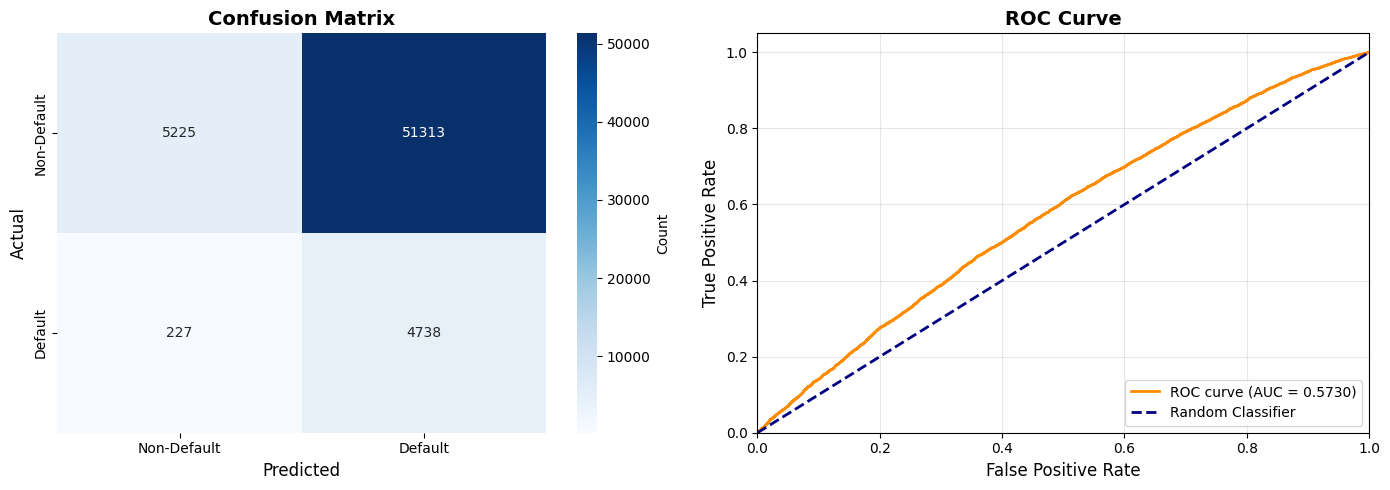


📋 성능 지표 요약표
지표                   Class 0 (정상)         Class 1 (불이행)       
------------------------------------------------------------
Recall                             9.24%              95.43%
Precision                         95.84%               8.45%
F1-Score                         0.1686             0.1553
------------------------------------------------------------
Accuracy                          16.20%
ROC-AUC                          0.5730
학습 시간                           119.60초


In [65]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_fscore_support
)

# ===================================
# 한글 폰트 경고 방지 설정
# ===================================
import platform
import matplotlib.font_manager as fm
import warnings

def set_korean_font():
    """시스템에 맞는 한글 폰트 자동 설정"""
    system = platform.system()

    if system == 'Windows':
        font_list = ['Malgun Gothic', 'NanumGothic', 'Gulim']
    elif system == 'Darwin':  # macOS
        font_list = ['AppleGothic', 'NanumGothic']
    else:  # Linux
        font_list = ['NanumGothic', 'NanumBarunGothic', 'DejaVu Sans']

    # 사용 가능한 폰트 찾기
    available_fonts = [f.name for f in fm.fontManager.ttflist]

    for font in font_list:
        if font in available_fonts:
            plt.rcParams['font.family'] = font
            return

    # 한글 폰트가 없으면 경고 무시
    warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# 한글 폰트 설정 실행
set_korean_font()
plt.rcParams['axes.unicode_minus'] = False

# ===================================
# 1️⃣ 데이터 전처리
# ===================================
X_train2 = X_train2.copy()
X_test2 = X_test2.copy()
for df in [X_train2, X_test2]:
    for c in df.select_dtypes(include=["bool"]).columns:
        df[c] = df[c].astype(int)

X_train2 = X_train2.dropna()
y_train = y_train.loc[X_train2.index]

X_test2 = X_test2.dropna()
y_test = y_test.loc[X_test2.index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

# ===================================
# 2️⃣ SVM 모델 학습
# ===================================
model = SVC(
    C=1,
    kernel='linear',
    tol=1e-3,
    max_iter=10000,
    cache_size=2000,
    probability=False,
    random_state=42
)

start_time = time.time()
model.fit(X_train_scaled, y_train.values.ravel())
train_elapsed = time.time() - start_time
train_accuracy = model.score(X_train_scaled, y_train)
print(f"✅ 훈련 완료! 소요 시간: {train_elapsed:.2f}초")
print(f"✅ 훈련 정확도: {train_accuracy:.4f}\n")

# ===================================
# 3️⃣ 예측 및 평가 지표 계산
# ===================================
threshold = -1.0
y_scores = model.decision_function(X_test_scaled)
y_pred = (y_scores >= threshold).astype(int)

# 전체 지표
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_scores)

# 클래스별 지표
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred, labels=[0, 1], zero_division=0
)

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)

# ===================================
# 4️⃣ 결과 출력
# ===================================
print("=" * 60)
print("📊 최종 모델 성능 평가")
print("=" * 60)
print(f"\n🎯 전체 지표:")
print(f"  ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n📈 클래스별 성능:")
print(f"  [Class 0 - 정상]")
print(f"    ├─ Precision: {precision[0]:.4f} ({precision[0]*100:.2f}%)")
print(f"    ├─ Recall:    {recall[0]:.4f} ({recall[0]*100:.2f}%)")
print(f"    ├─ F1-Score:  {f1[0]:.4f}")
print(f"    ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"    └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n  [Class 1 - 불이행]")
print(f"    ├─ Precision: {precision[1]:.4f} ({precision[1]*100:.2f}%)")
print(f"    ├─ Recall:    {recall[1]:.4f} ({recall[1]*100:.2f}%)")
print(f"    ├─ F1-Score:  {f1[1]:.4f}")
print(f"    ├─ Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"    └─ ROC-AUC:   {roc_auc:.4f}")

print(f"\n🔢 혼동 행렬:")
print(f"    실제\\예측    정상    불이행")
print(f"    정상      {cm[0,0]:6d}  {cm[0,1]:6d}")
print(f"    불이행    {cm[1,0]:6d}  {cm[1,1]:6d}")
print(f"\n❌ 놓친 불이행 고객 수(FN): {cm[1,0]}")
print("=" * 60)

# ===================================
# 5️⃣ 시각화
# ===================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 📌 혼동 행렬 히트맵
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'],
            ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted', fontsize=12)
ax1.set_ylabel('Actual', fontsize=12)

# 📌 ROC 곡선
ax2 = axes[1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
ax2.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================
# 6️⃣ 성능 요약 표
# ===================================
print("\n📋 성능 지표 요약표")
print("=" * 60)
print(f"{'지표':<20} {'Class 0 (정상)':<20} {'Class 1 (불이행)':<20}")
print("-" * 60)
print(f"{'Recall':<20} {recall[0]*100:>18.2f}% {recall[1]*100:>18.2f}%")
print(f"{'Precision':<20} {precision[0]*100:>18.2f}% {precision[1]*100:>18.2f}%")
print(f"{'F1-Score':<20} {f1[0]:>18.4f} {f1[1]:>18.4f}")
print("-" * 60)
print(f"{'Accuracy':<20} {accuracy*100:>18.2f}%")
print(f"{'ROC-AUC':<20} {roc_auc:>18.4f}")
print(f"{'학습 시간':<20} {train_elapsed:>17.2f}초")
print("=" * 60)